#### Note: All the observations are till 2016 Rio Olympics

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [91]:
# Load the dataset 

athletes = pd.read_csv("E:/Data Analytics Projects/Python EDA Projects/Dataset/Olympics Dataset/athlete_events.csv")
regions = pd.read_csv("E:/Data Analytics Projects/Python EDA Projects/Dataset/Olympics Dataset/noc_regions.csv")

In [92]:
#Print first five rows from athletes dataset

athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [93]:
# Print first five rows from regions dataset

regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [94]:
# Join the dataframes using (how) left join with the common column (on) NOC

athletes_df = athletes.merge(regions, how='left', on='NOC')

In [95]:
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [96]:
# To check the dimensions (rows and columns) of the joined dataframe

athletes_df.shape 

(271116, 17)

In [97]:
# To make column names consistent 
# The column names are not consistent, as the rest of the columns excluding the last two columns are starting with capital letter 
# and the last two columns which are added after the merge operation starts with Lower Case letter.

athletes_df.rename(columns={'region':'Region', 'notes':'Notes'}, inplace=True)

In [98]:
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [99]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [100]:
# describe method is used for calculating statistical infomation- by default it will only give information about Numerical cols

athletes_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [101]:
# Check Null Values (missing values)

nan_values = athletes_df.isna()
nan_columns = nan_values.any()
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

So it means that in 6 columns (Age, Height, Weight, Medal, Region, Notes) we have Missing Values or Null Values (as True)

In [102]:
# Total number of null values for the above 6 columns

athletes_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

### Print the column names containing null values or missing values in the form of a list

#### Concept used is this
- nan_values = df.isna()

- nan_columns = nan_values.any()

- columns_with_nan = df.columns[nan_columns].tolist()
- print(columns_with_nan)

In [382]:
athletes_df.columns[athletes_df.isnull().any()].tolist()

['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']

## Athletes who have participated in Olympics from India's Team

In [104]:
athletes_df.query('Team=="India"').head(15)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN
898,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
899,512,Shiny Kurisingal Abraham-Wilson,F,27.0,167.0,53.0,India,IND,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Women's 800 metres,NaN,India,NaN
900,512,Shiny Kurisingal Abraham-Wilson,F,31.0,167.0,53.0,India,IND,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
1183,663,Sharath Kamal Achanta,M,22.0,186.0,85.0,India,IND,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Men's Singles,NaN,India,NaN
1184,663,Sharath Kamal Achanta,M,26.0,186.0,85.0,India,IND,2008 Summer,2008,Summer,Beijing,Table Tennis,Table Tennis Men's Singles,NaN,India,NaN


### Observations:
- Some of the athletes who have represented India in the Olympics include:
    - ***S. Abdul Hamid***: Competed in Athletics Men's 110 metres Hurdles and Athletics Men's 400 metres Hurdles events.

    - ***Shiny Kurisingal Abraham-Wilson***: Competed in Athletics Women's 800 metres, Athletics Women's 4 x 400 metres Relay, and Athletics Women's 800 metres events.
   
    - ***Sharath Kamal Achanta***: Competed in Table Tennis Men's Singles event.
 
    - ***Badathala Adisekhar***: Competed in Weightlifting Men's Flyweight event.

## Athletes who have participated in Olympics from Japan's Team

In [155]:
athletes_df.query('Team=="Japan"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN
631,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan,NaN
632,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan,NaN


### Observations:
- Some of the athletes who have represented Japan in the Olympics include:
    - ***Isao Ko Abe***: Competed in Athletics Men's Hammer Throw event.
    - ***Kazumi Abe***: Competed in Bobsleigh Men's Four event.
    - ***Kazuo Abe***: Competed in Wrestling Men's Lightweight, Freestyle event.
    - ***Kinya Abe***: Competed in Fencing Men's Foil, Individual event.

## Top 10 countries who have participated since the inception of Olympics in 1896

In [156]:
top_10_countries = athletes_df.Team.value_counts().sort_values(ascending=False).head(10)

In [157]:
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

### Observations:
- The country with the highest number of participants since the inception of the Olympics is the **United States**,
with 17,847 participants. Following closely behind are **France** with 11,988 participants and **Great Britain** with 11,404 participants.

#### Create a bar plot for the top 10 countries who have participated since the inception of Olympics in 1896

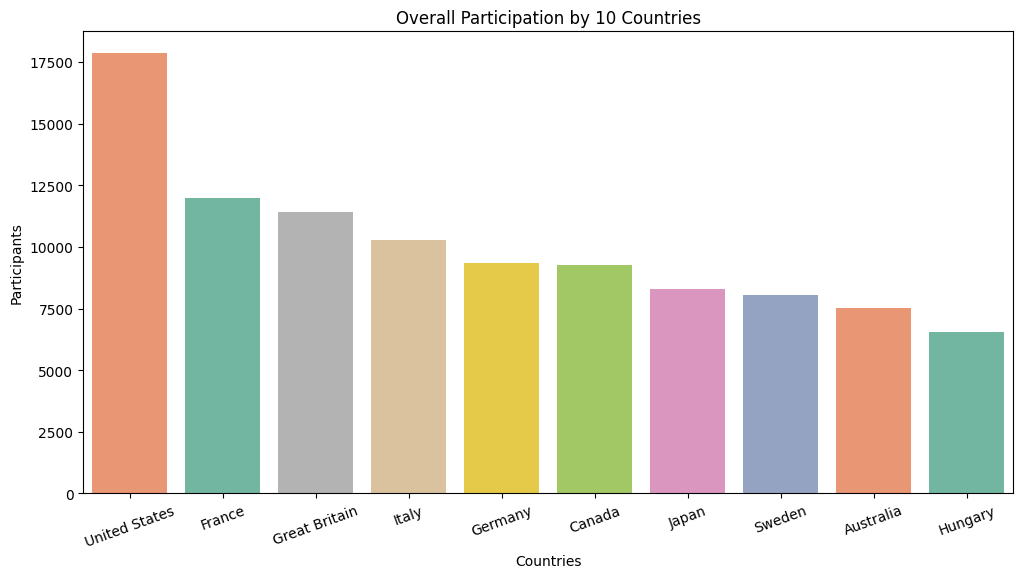

In [174]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=20)
plt.title("Overall Participation by 10 Countries")
plt.xlabel('Countries')
plt.ylabel('Participants')
sns.barplot(x=top_10_countries.index, y=top_10_countries, hue=top_10_countries , legend=False, palette='Set2')
plt.show()

#

## Age Distribution of the Participants

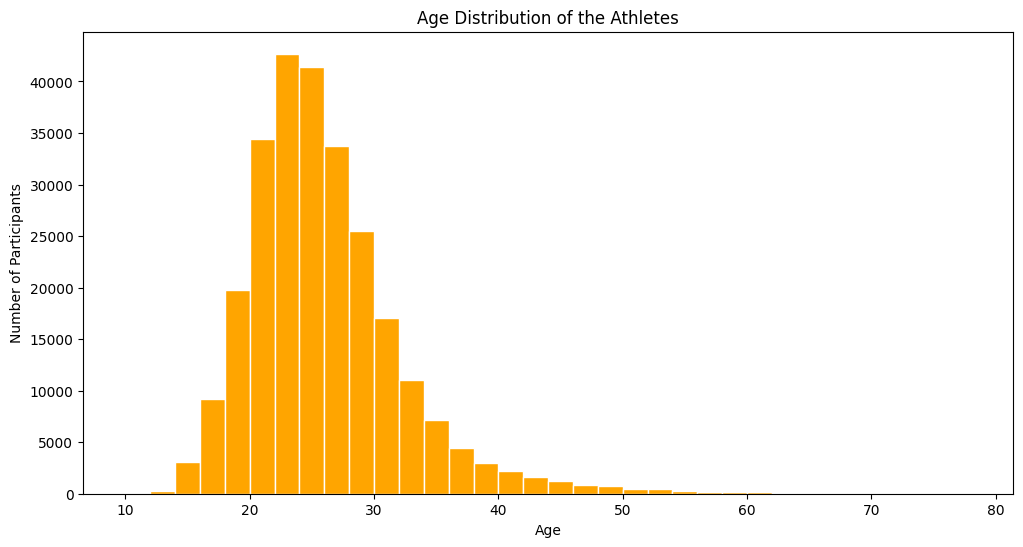

In [175]:
# plotting histogram

plt.figure(figsize=(12,6))
plt.title('Age Distribution of the Athletes')
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.hist(athletes_df.Age, bins=np.arange(10,80,2), color='orange', edgecolor='white');

### Observations:
- The majority of Olympic participants fall within the age range of **20 to 30 years**. 
- Nevertheless, there are only a limited number of athletes aged above 50 years old, as well as some
who are below 16 years old, participating in the Olympics.

#


##### We will now examine various sporting events that are included in the Summer and Winter Olympic Games.

##### Winter Sports

In [176]:
athletes_df[athletes_df.Season=="Winter"]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [177]:
athletes_df[athletes_df.Season=="Winter"].Sport

4         Speed Skating
5         Speed Skating
6         Speed Skating
7         Speed Skating
8         Speed Skating
              ...      
271111             Luge
271112      Ski Jumping
271113      Ski Jumping
271114        Bobsleigh
271115        Bobsleigh
Name: Sport, Length: 48564, dtype: object

In [178]:
winter_olympics_sports = athletes_df[athletes_df.Season=="Winter"].Sport.unique()

In [179]:
winter_olympics_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

So, we get the sports held during **Winter Olympics**

#

##### Summer Sports

In [180]:
athletes_df[athletes_df.Season=='Summer']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN


In [181]:
summer_olympics_sports = athletes_df[athletes_df.Season=='Summer'].Sport.unique()

In [182]:
summer_olympics_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

So, we get the sports held during **Summer Olympics**

### Observations:
- It is observed that there is a greater quantity of Olympic sports featured in the Summer Olympics as opposed to the Winter Olympics.

## Total Number of Male v/s Female Participants

In [194]:
gender_counts = athletes_df.Sex.value_counts()

In [195]:
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

#### Pie Plot for Male and Female Participants to compare the participation gender-wise

([<matplotlib.patches.Wedge at 0x2c77c6c3b80>,
 [Text(-0.7147310163003325, 0.8361576252945936, 'M'),
  Text(0.7147309380136029, -0.8361576922125369, 'F')],
 [Text(-0.38985328161836313, 0.4560859774334146, '72.51%'),
  Text(0.38985323891651064, -0.45608601393411097, '27.49%')])

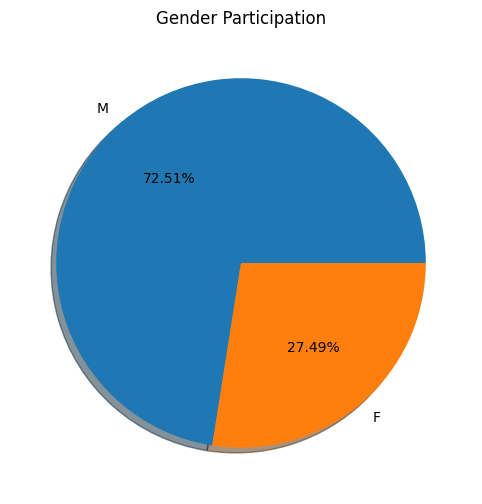

In [196]:
plt.figure(figsize=(12,6))
plt.title('Gender Participation')
plt.pie(gender_counts, labels=gender_counts.index,autopct='%1.2f%%', shadow=True)

### Observations:
- There is a **higher number of male participants (72.51%)** as compared to female participants (27.49%).

## Total medals won by Athletes

In [234]:
athletes_df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

### Observations:
- The counts of gold, bronze, and silver medals are relatively similar.

## To determine the total number of Female Athletes who have participated in the Summer Olympics for each year

In [265]:
female_participants = athletes_df[(athletes_df.Sex=='F') & (athletes_df.Season=='Summer')][['Sex', 'Year']]

In [266]:
female_participants = female_participants.groupby('Year').count().reset_index()

In [267]:
female_participants.rename(columns={'Sex':'Female Athletes Count'}, inplace=True)

In [268]:
female_participants.head()

,Year,Female Athletes Count
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87


In [269]:
# To get the recent data

female_participants.tail()

,Year,Female Athletes Count
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


In [270]:
# An alternative approach to filtering the data for female athletes

# In the womenOlmypics dataframe you will get all the columns whereas in female_olympics dataframe you only got Female
# Athletes (Sex) and Year

womenOlympics = athletes_df[(athletes_df.Sex=='F') & (athletes_df.Season=='Summer')]

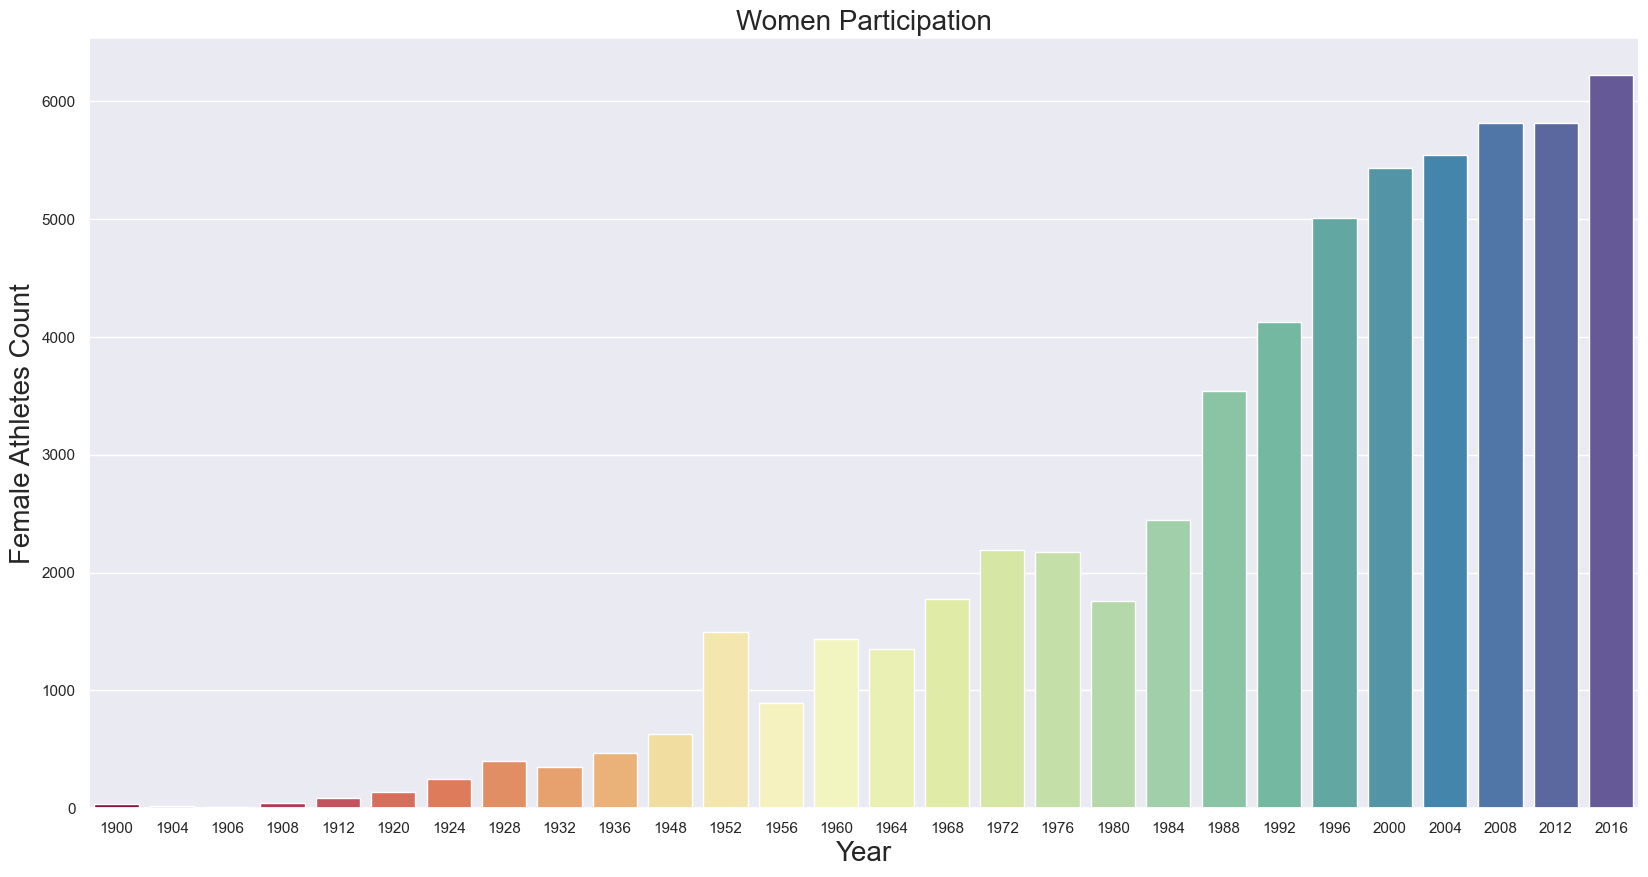

In [271]:
# Count Plot

sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
plt.title('Women Participation', fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Female Athletes Count', fontsize=20)
sns.countplot(x='Year', data=womenOlympics, hue='Year', legend=False, palette='Spectral')
plt.show()

### Observations:
- The total number of female athletes has demonstrated a consistent upward trend from 1980 to the 2016 Olympics, reaching its peak during the **2016 Olympics, where 6223 female athletes participated**

Text(0.5, 1.0, 'Plot of Female Athletes over time')

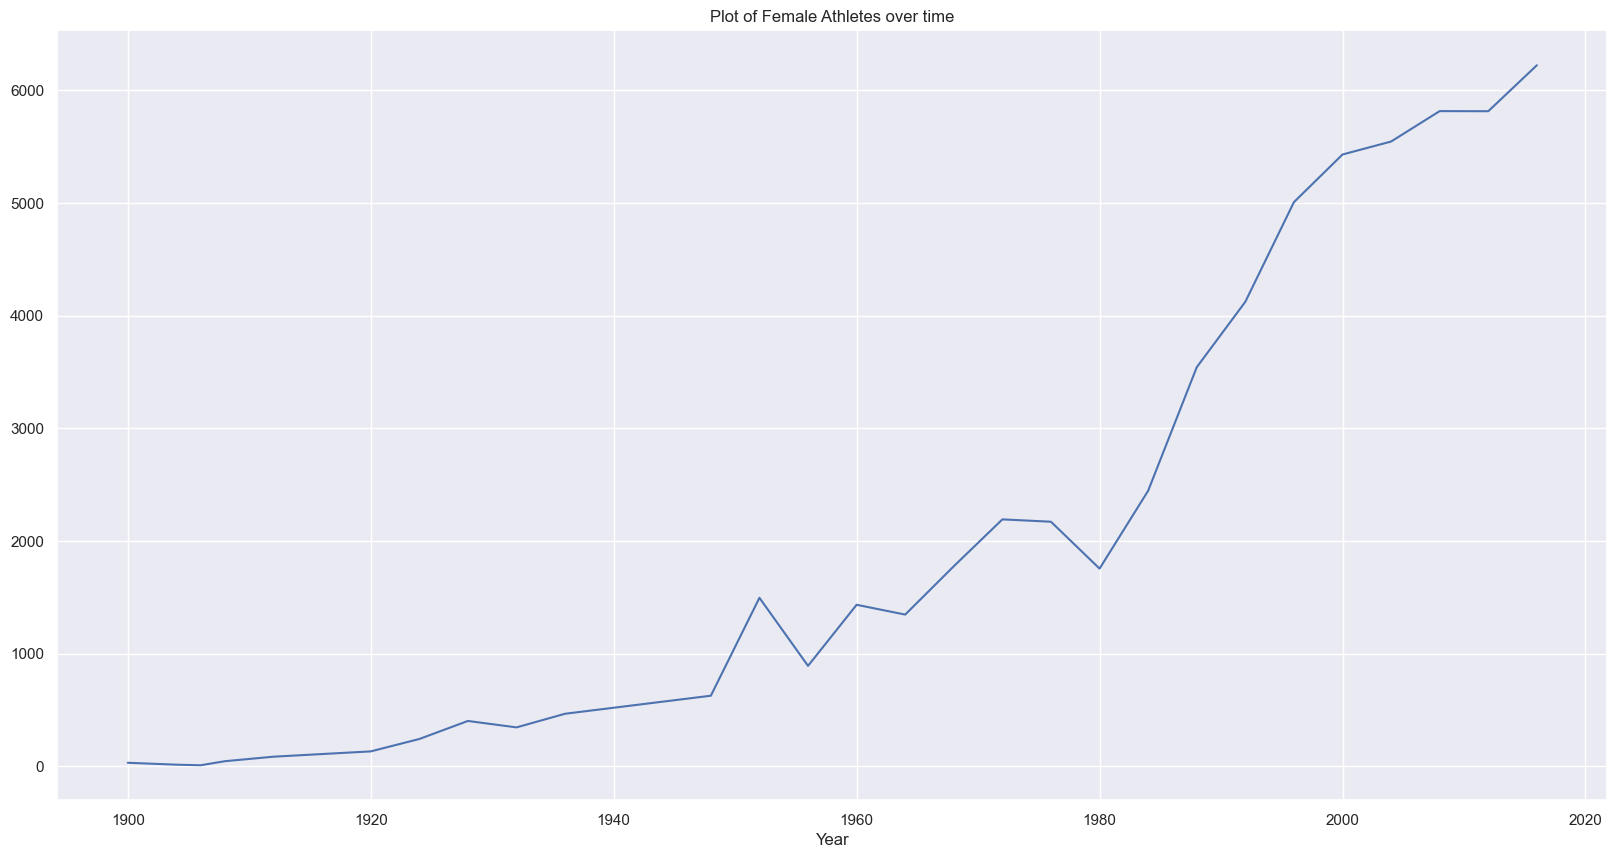

In [283]:
# Line Graph 

part = womenOlympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
part.loc[:,'F'].plot()
plt.title('Plot of Female Athletes over time')

## Details of the athletes who has won Gold Medal

In [284]:
goldMedals = athletes_df[(athletes_df.Medal=="Gold")]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [310]:
# take only the values that are different from Nan

goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]

## How many athletes have secured gold medal beyond 60 years of age

In [311]:
goldMedals['ID'][goldMedals['Age'] > 60].count()

6

### Observations:
- There are **6 athletes who have won gold medals at the age of over 60 years**. This suggests a high level of professionalism and exceptional performance in their respective sports.

## The names of athletes who won gold medals at the age of over 60 

In [312]:
athletes_gold_more_than_60 = goldMedals[['Name', 'Sport']][goldMedals['Age'] > 60] 

In [313]:
athletes_gold_more_than_60

,Name,Sport
104003,Isaac Lazarus Israls,Art Competitions
105199,Charles Jacobus,Roque
190952,"Lida Peyton ""Eliza"" Pollock (McMillen-)",Archery
226374,"Galen Carter ""G. C."" Spencer",Archery
233390,Oscar Gomer Swahn,Shooting
261102,"Robert W. Williams, Jr.",Archery


### Observations:
The **6 gold medals** won by athletes over the age of 60 were distributed as follows:
- **1 gold medal in Art Competitions by Isaac Lazarus Israls**
- **1 gold medal in Roque by Charles Jacobus**
- **3 gold medals in Archery by Lida Peyton "Eliza" Pollock (McMillen-), Galen Carter "G. C." Spencer and 
Robert W. Williams, Jr.**
- **1 gold medal in Shooting by Oscar Gomer Swahn**


In [314]:
# For which sport these gold medals (age > 60) has come

sporting_event = goldMedals['Sport'][goldMedals['Age']>60]

In [315]:
sporting_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

### Observations:
The **6 gold medals** won by athletes over the age of 60 were distributed across different sports as follows:
- **1 gold medal in Art Competitions**
- **1 gold medal in Roque**
- **3 gold medals in Archery**
- **1 gold medal in Shooting**


Text(0.5, 1.0, 'Gold Medals for Athletes over 60 years')

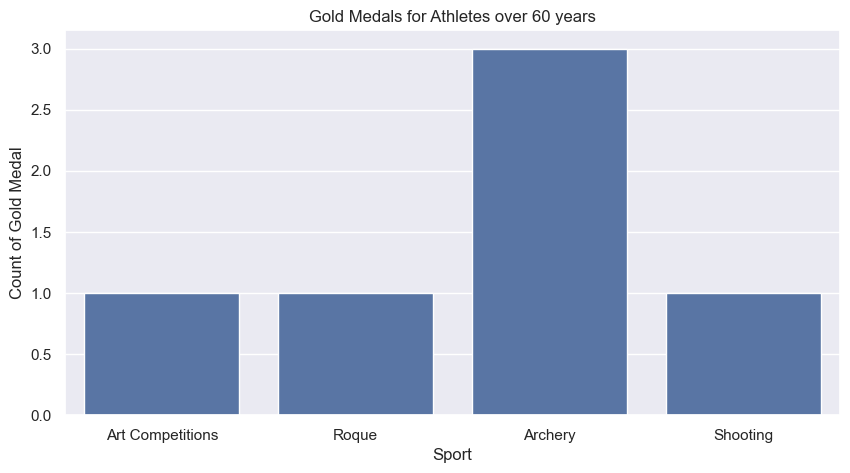

In [324]:
# Plot for sporting event

plt.figure(figsize=(10,5))
plt.tight_layout()
sns.countplot(x=sporting_event)
plt.xlabel("Sport")
plt.ylabel("Count of Gold Medal")
plt.title('Gold Medals for Athletes over 60 years')

## Top 5 Countries in terms of total Gold Medals

In [362]:
goldMedals.Region.value_counts().reset_index(name="Medal").head(6)

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567
5,France,491


### Observations
- The USA (2627) has secured the highest number of gold medals, followed by Russia (1599) and Germany (1293).
This dominance in gold medal count showcases their professionalism and excellence in various sporting disciplines.

Text(0.5, 1.0, 'Gold Medals Per Country')

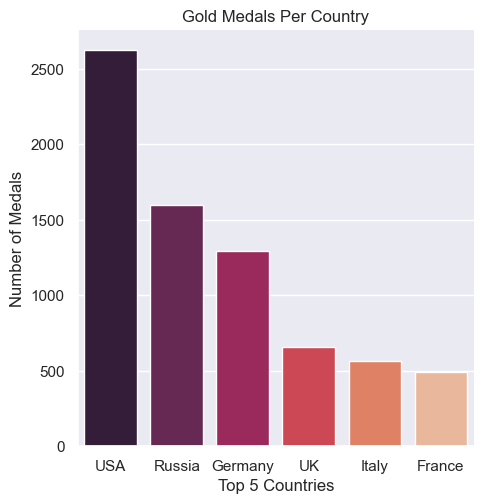

In [361]:
# Create a Plot to visualize the total gold medals for each country

totalGoldMedals = goldMedals.Region.value_counts().reset_index(name="Medal").head(6)

g = sns.catplot(x="index", y="Medal", data=totalGoldMedals, 
                height=5, kind="bar",hue="index", legend=False,palette="rocket")


g.set_xlabels("Top 5 Countries")
g.set_ylabels("Number of Medals")
plt.title("Gold Medals Per Country")

#

### Analyze the 2016 Rio Olympics in terms of Gold Medal (Recent as per our dataset)

In [364]:
max_year = athletes_df.Year.max()
print(max_year)

2016


In [369]:
team_names = athletes_df[(athletes_df.Year==max_year) & (athletes_df.Medal=='Gold')].Team

team_names.value_counts().head(10)

United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

In [370]:
team_names.value_counts().tail()

Ethiopia                       1
Armenia                        1
Individual Olympic Athletes    1
Turkey                         1
Slovenia                       1
Name: Team, dtype: int64

### Observations
- In the Rio Olympics - 2016, the United States secured the highest number of gold medals (137),
followed by Great Britain (64), and then Russia (50). 
- Ethiopia, Armenia, and Turkey struggled but managed to secure just one gold medal each. 

Text(0.5, 0, 'Countrywise Medals for the year 2016')

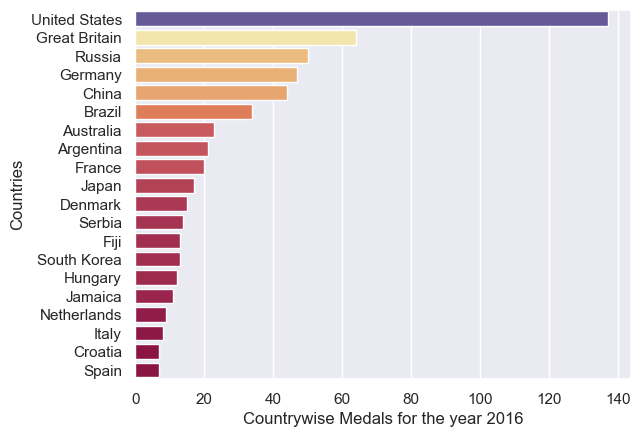

In [377]:
# Create a bar plot
# Top 20 nations who secured the most number of gold medals in Rio Olympics

sns.barplot(x=team_names.value_counts().head(20), y=team_names.value_counts().head(20).index, hue=team_names.value_counts().head(20), 
            legend=False, palette='Spectral')
plt.ylabel('Countries')
plt.xlabel('Countrywise Medals for the year 2016')

#

###  To create a Scatter plot visualizing the height and weight of male and female athletes who have won a medal 

(be it any - gold, silver, bronze)

In [378]:
# First filter the data for athletes who have won a medal (exclude Null values)


not_null_medals = athletes_df[(athletes_df['Height'].notnull()) & (athletes_df['Weight'].notnull())]


In [379]:
not_null_medals

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

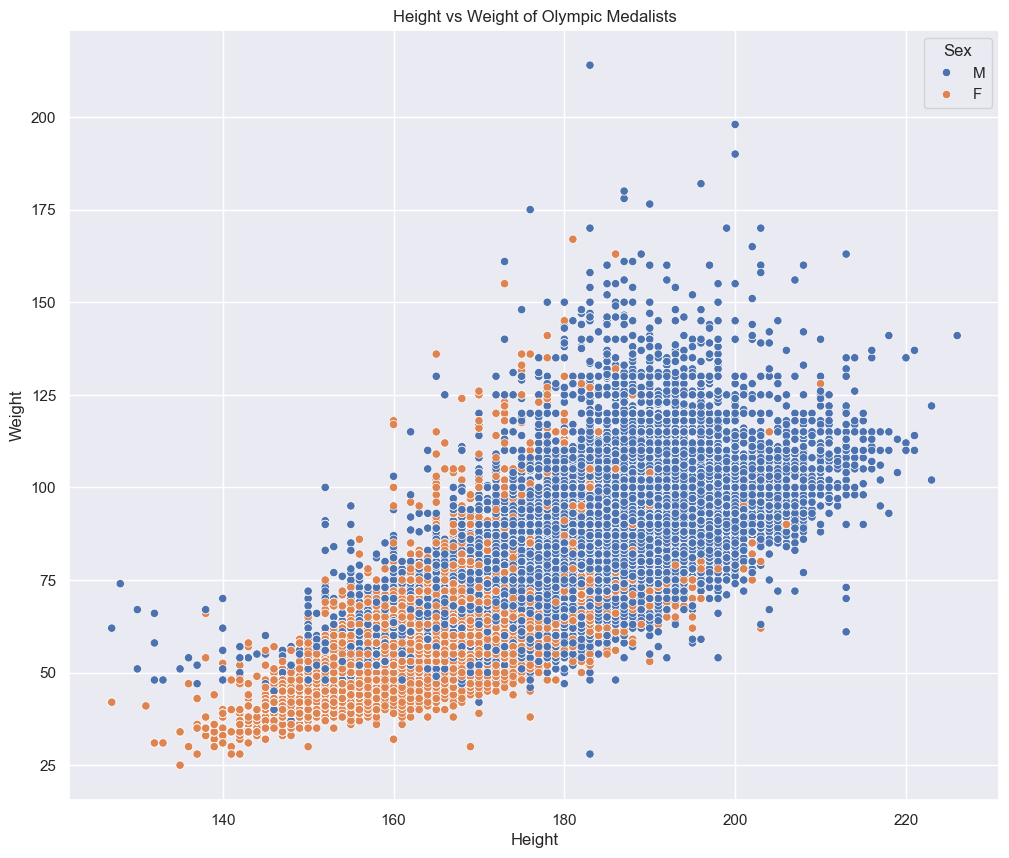

In [384]:
plt.figure(figsize=(12,10))
axis = sns.scatterplot(x='Height',y='Weight',data=not_null_medals,hue="Sex")
plt.title('Height vs Weight of Olympic Medalists')